In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pathlib
path = pathlib.Path('/content/gdrive/My Drive/health_data.csv') 

df = pd.read_csv(path)
df = df.dropna(axis = 0).reset_index(drop=True)
height = torch.tensor(df.height)
weight = torch.tensor(df.weight)
x_train = height.view([height.shape[0],1]).float() 
y_train = weight.view([weight.shape[0],1]).float()
df.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


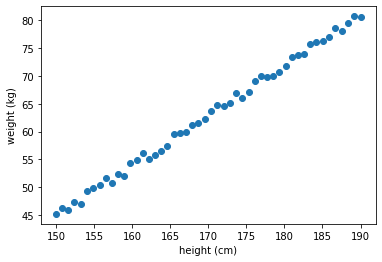

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

x = x_train
y = y_train

plt.scatter(x, y)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [4]:
#답안 작성

# Wieght와 bias 
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Data normlization
x_min, x_max = x_train.min(), x_train.max() # x의 최대, 최솟값
y_min, y_max = y_train.min(), y_train.max() # y의 최대, 최솟값
x = (x_train-x_min)/(x_max-x_min)
y = (y_train-y_min)/(y_max-y_min)

# [Do it yourself] optimizer 설정(Parameter는 W,b이며, learnaing rate는 0.1로 시작해보고, 적당한 값을 튜닝해 보세요.)
# Hint: SGD 또는 많이 사용하는 Adam을 사용해서 optimizer를 생성해보세요
optimizer = optim.Adam([W,b], lr=0.1)

# 경사 하강법을 반복 횟수 설정
epochs = 6000

for epoch in range(epochs + 1):
    # H(x) 계산
    hypothesis = W * x_train + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # [Do it yourself] cost로 H(x) 개선을 위한 update (update 순서 : zero_grad() -> backward() -> step())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 1000번마다 로그 출력
    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/6000 W: 0.100, b: 0.100 Cost: 4071.079590
Epoch 1000/6000 W: 0.421, b: -8.170 Cost: 32.347797
Epoch 2000/6000 W: 0.521, b: -25.323 Cost: 20.334225
Epoch 3000/6000 W: 0.649, b: -47.205 Cost: 9.088360
Epoch 4000/6000 W: 0.773, b: -68.411 Cost: 2.557950
Epoch 5000/6000 W: 0.852, b: -81.680 Cost: 0.682819
Epoch 6000/6000 W: 0.882, b: -86.912 Cost: 0.374543


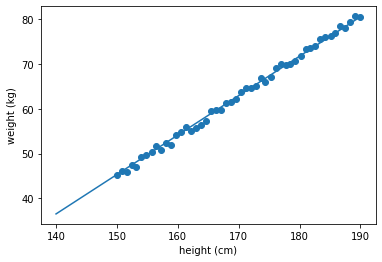

In [9]:
# 직선 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = x_train
y = y_train
plt.scatter(x, y)

t = np.arange(140.,190.,0.001)

# t를 normalize한 뒤 y값 예측
t_norm = (t-x_min.numpy())/(x_max.numpy()-x_min.numpy())
output = W.item()*t_norm+b.item()

# y를 denormalize
y_denorm = (output)*(y_max.numpy()-y_min.numpy())+y_min.numpy()

plt.plot(t, W.item()*t+b.item())
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()